In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#for filename in filenames:
#print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Reading and making a copy of the dataset

main_df = pd.read_csv("bank_customer_survey.csv")
df = main_df.copy()
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47          blue  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0

In [12]:
# Checking the shape of the dataset

df.shape

(45211, 17)

In [13]:
# Finding the basic information regarding dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [14]:
# Finding the number of unique values present in each column

df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [15]:
# Checking if any NaN is present in column or not

df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

<AxesSubplot:>

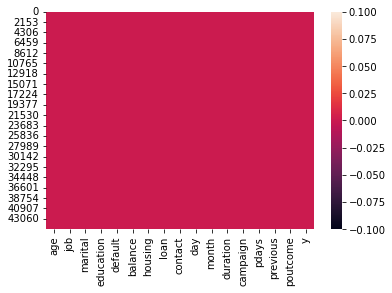

In [16]:
# Checking for null value using heatmap

sns.heatmap(df.isnull())

In [17]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47          blue  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0

In [18]:
# Dropping columns because they will not contribute anything in model building

df=df.drop(columns=["contact", "poutcome", "y"],axis=1)
df.head()

age           job  marital  education default  balance housing loan  day  \
0   58    management  married   tertiary      no     2143     yes   no    5   
1   44    technician   single  secondary      no       29     yes   no    5   
2   33  entrepreneur  married  secondary      no        2     yes  yes    5   
3   47          blue  married    unknown      no     1506     yes   no    5   
4   33       unknown   single    unknown      no        1      no   no    5   

  month  duration  campaign  pdays  previous  
0   may       261         1     -1         0  
1   may       151         1     -1         0  
2   may        76         1     -1         0  
3   may        92         1     -1         0  
4   may       198         1     -1         0

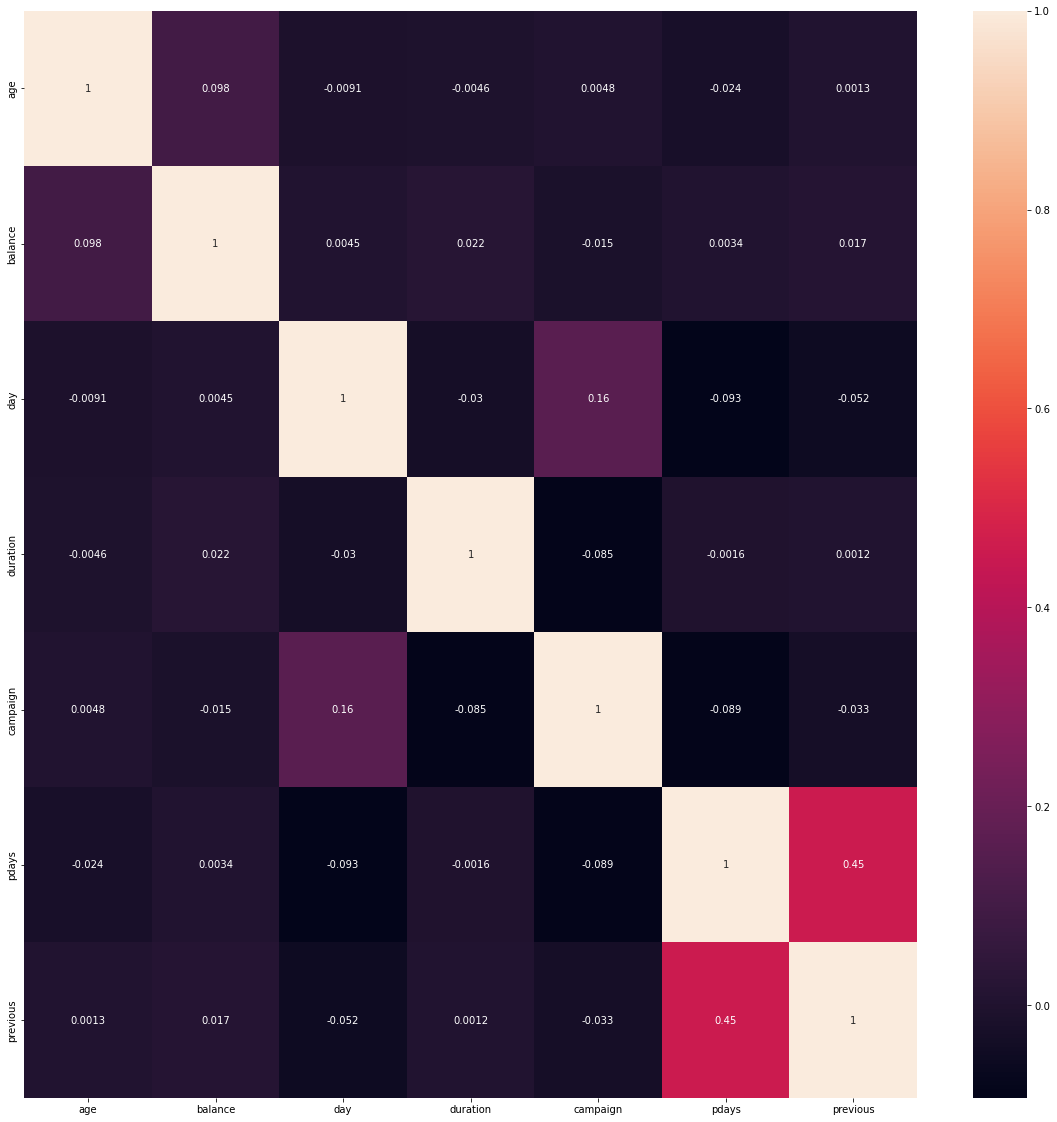

In [19]:
# Finding the correlation between the feature column

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [20]:
# Checking for correlation by unstacking data

corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[24:50:2]

duration  day         0.030206
pdays     age         0.023758
balance   duration    0.021560
          previous    0.016674
campaign  balance     0.014578
age       day         0.009120
campaign  age         0.004760
age       duration    0.004648
day       balance     0.004503
balance   pdays       0.003435
duration  pdays       0.001565
previous  age         0.001288
duration  previous    0.001203
dtype: float64

In [ ]:
# Filling the missing value in the income my mean

#df['Income'] = df['Income'].fillna(df['Income'].mean())
#df.isna().any() 

In [21]:
df.head()

age           job  marital  education default  balance housing loan  day  \
0   58    management  married   tertiary      no     2143     yes   no    5   
1   44    technician   single  secondary      no       29     yes   no    5   
2   33  entrepreneur  married  secondary      no        2     yes  yes    5   
3   47          blue  married    unknown      no     1506     yes   no    5   
4   33       unknown   single    unknown      no        1      no   no    5   

  month  duration  campaign  pdays  previous  
0   may       261         1     -1         0  
1   may       151         1     -1         0  
2   may        76         1     -1         0  
3   may        92         1     -1         0  
4   may       198         1     -1         0

In [25]:
# Checking number of unique categories present in the "Marital_Status"

df['duration'].value_counts() 
df['balance'].value_counts() 

 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

In [26]:
df['education'] = df['education'].replace(['unknown'], 'first grade')
df['job'] = df['job'].replace(['unknown'],'unemployed')

In [27]:
# Count of different values present in Marital_Status

df['duration'].value_counts()  

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64

In [ ]:
# Combining different dataframe into a single column to reduce the number of dimension

#df['Kids'] = df['Kidhome'] + df['Teenhome']
#df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
#df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
#df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [ ]:
# Deleting some column to reduce dimension and complexity of model

#col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
#df=df.drop(columns=col_del,axis=1)
#df.head()

In [ ]:
# Adding a column "Age" in the dataframe

#df['Age'] = 2015 - df["Year_Birth"]

In [28]:
df['duration'].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64

In [33]:
df.job

0          management
1          technician
2        entrepreneur
3                blue
4          unemployed
             ...     
45206      technician
45207         retired
45208         retired
45209            blue
45210    entrepreneur
Name: job, Length: 45211, dtype: object

In [57]:
# Changing category into UG and PG only

df['job'] = df['job'].replace(['management','technician','blue', 'entrepreneur', 'admin', 'self'],'Middle')  
df['job'] = df['job'].replace(['retired', 'unemployed', 'services', 'student', 'housemaid'], 'Lower')

In [ ]:
# Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format
#df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
#df['first_day'] = '01-01-2015'
#df['first_day'] = pd.to_datetime(df.first_day)
#df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [55]:
df.head()

age     job    education  balance loan  day  duration
0   58  Middle     tertiary     2143   no    5       261
1   44  Middle    secondary       29   no    5       151
2   33  Middle    secondary        2  yes    5        76
3   47  Middle  first grade     1506   no    5        92
4   33   Lower  first grade        1   no    5       198

In [61]:
#df=df.drop(columns=["marital", "default", "housing", "month", "campaign", "pdays", "previous"],axis=1)
#df.shape
df

age     job    education  balance loan  day  duration
0       58  Middle     tertiary     2143   no    5       261
1       44  Middle    secondary       29   no    5       151
2       33  Middle    secondary        2  yes    5        76
3       47  Middle  first grade     1506   no    5        92
4       33   Lower  first grade        1   no    5       198
...    ...     ...          ...      ...  ...  ...       ...
45206   51  Middle     tertiary      825   no   17       977
45207   71   Lower      primary     1729   no   17       456
45208   72   Lower    secondary     5715   no   17      1127
45209   57  Middle    secondary      668   no   17       508
45210   37  Middle    secondary     2971   no   17       361

[45211 rows x 7 columns]

In [63]:
fig = px.bar(df, x='age', y='duration', color="job")
fig.show()

In [64]:
fig = px.bar(df, x='age', y='duration', color="loan")
fig.show()

In [65]:
fig = px.bar(df, x='age', y='duration', color="education")
fig.show()

In [68]:
fig = px.histogram (df, x = "duration",  facet_row = "education",  template = 'plotly_dark')
fig.show ()

In [ ]:
#fig = px.histogram (df, x = "Expenses",  facet_row = "Education",  template = 'plotly_dark')
#fig.show ()

In [ ]:
#fig = px.histogram (df, x = "NumTotalPurchases",  facet_row = "Education",  template = 'plotly_dark')
#fig.show ()

In [ ]:
#fig = px.histogram (df, x = "Age",  facet_row = "Marital_Status",  template = 'plotly_dark')
#fig.show ()

In [ ]:
#fig = px.histogram (df, x = "Income",  facet_row = "Marital_Status",  template = 'plotly_dark')
#fig.show ()

In [71]:
fig =  px.pie (df, names = "day", hole = 0.4, template = "gridon")
fig.show ()

In [72]:
fig =  px.pie (df, names = "education", hole = 0.4, template = "plotly_dark")
fig.show ()

In [74]:
df

age     job    education  balance loan  day  duration
0       58  Middle     tertiary     2143   no    5       261
1       44  Middle    secondary       29   no    5       151
2       33  Middle    secondary        2  yes    5        76
3       47  Middle  first grade     1506   no    5        92
4       33   Lower  first grade        1   no    5       198
...    ...     ...          ...      ...  ...  ...       ...
45206   51  Middle     tertiary      825   no   17       977
45207   71   Lower      primary     1729   no   17       456
45208   72   Lower    secondary     5715   no   17      1127
45209   57  Middle    secondary      668   no   17       508
45210   37  Middle    secondary     2971   no   17       361

[45211 rows x 7 columns]

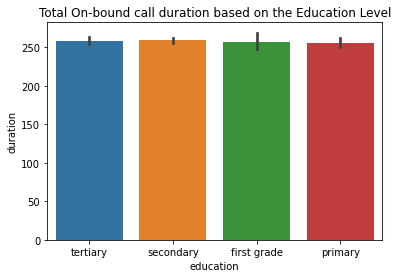

In [77]:
sns.barplot(x = df['education'],y = df['duration']);
plt.title('Total On-bound call duration based on the Education Level');

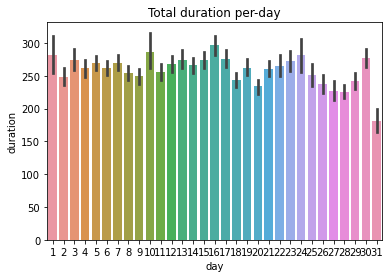

In [80]:
sns.barplot(x = df['day'],y = df['duration']);
plt.title('Total duration per-day');

In [81]:
df.describe()

age        balance           day      duration
count  45211.000000   45211.000000  45211.000000  45211.000000
mean      40.936210    1362.272058     15.806419    258.163080
std       10.618762    3044.765829      8.322476    257.527812
min       18.000000   -8019.000000      1.000000      0.000000
25%       33.000000      72.000000      8.000000    103.000000
50%       39.000000     448.000000     16.000000    180.000000
75%       48.000000    1428.000000     21.000000    319.000000
max       95.000000  102127.000000     31.000000   4918.000000

<AxesSubplot:>

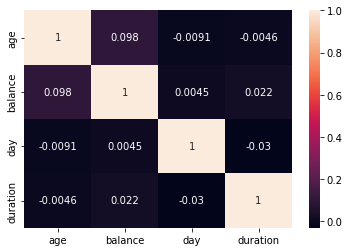

In [82]:
sns.heatmap(df.corr(), annot=True)

In [83]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['job', 'education', 'loan']


In [84]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [85]:
df['duration'].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64

In [86]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [87]:
df1 = df.copy()

In [88]:
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [89]:
scaled_features_df.head()

age       job  education   balance      loan       day  duration
0  1.606965  0.539312   1.206484  0.256419 -0.436803 -1.298476  0.011016
1  0.288529  0.539312  -0.077715 -0.437895 -0.436803 -1.298476 -0.416127
2 -0.747384  0.539312  -0.077715 -0.446762  2.289359 -1.298476 -0.707361
3  0.571051  0.539312  -2.646114  0.047205 -0.436803 -1.298476 -0.645231
4 -0.747384 -1.854213  -2.646114 -0.447091 -0.436803 -1.298476 -0.233620

In [90]:
from sklearn.cluster import KMeans

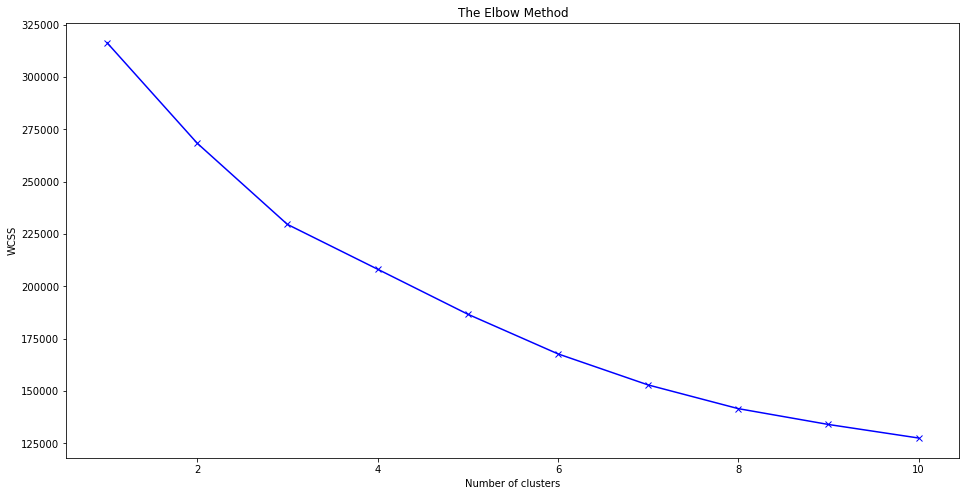

In [91]:
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(scaled_features_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [92]:
from sklearn.metrics import silhouette_score 

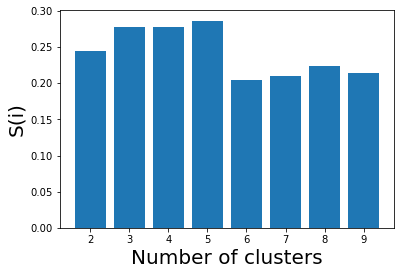

In [93]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [94]:
silhouette_scores

[0.24509516124652408,
 0.2787448821731316,
 0.27852612922231024,
 0.28680649649202805,
 0.20473247127271546,
 0.21034403037515764,
 0.22446434379998806,
 0.2143353091273138]

In [95]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  5


In [96]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)


# Appending those cluster value into main dataframe (without standard-scalar)

df['cluster'] = pred + 1

In [97]:
df.head()

age  job  education  balance  loan  day  duration  cluster
0   58    1          3     2143     0    5       261        2
1   44    1          2       29     0    5       151        2
2   33    1          2        2     1    5        76        5
3   47    1          0     1506     0    5        92        2
4   33    0          0        1     0    5       198        3

In [98]:
scaled_features_df.head()

age       job  education   balance      loan       day  duration
0  1.606965  0.539312   1.206484  0.256419 -0.436803 -1.298476  0.011016
1  0.288529  0.539312  -0.077715 -0.437895 -0.436803 -1.298476 -0.416127
2 -0.747384  0.539312  -0.077715 -0.446762  2.289359 -1.298476 -0.707361
3  0.571051  0.539312  -2.646114  0.047205 -0.436803 -1.298476 -0.645231
4 -0.747384 -1.854213  -2.646114 -0.447091 -0.436803 -1.298476 -0.233620

In [100]:
df['education'].value_counts()

2    23202
3    13301
1     6851
0     1857
Name: education, dtype: int64

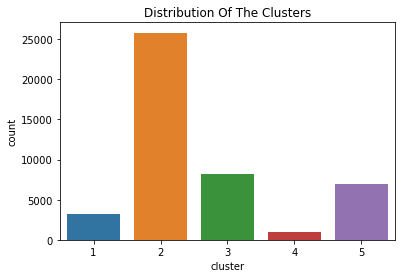

In [101]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


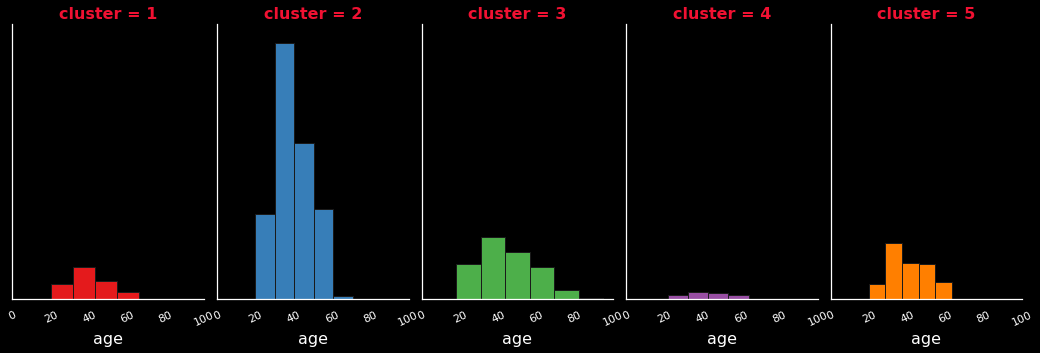

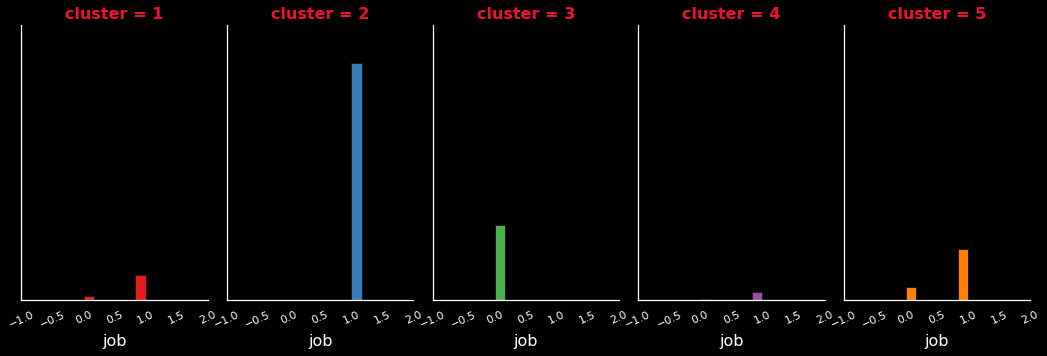

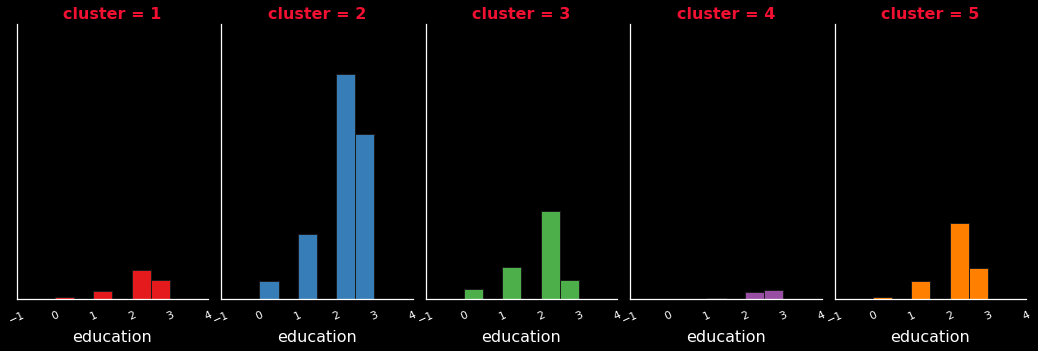

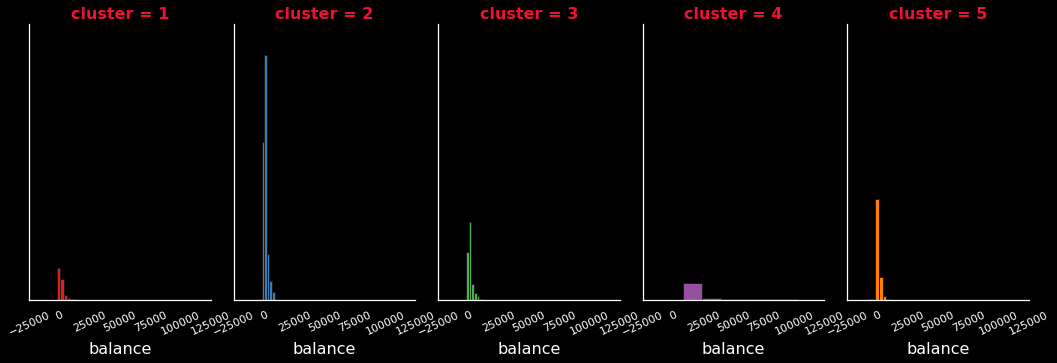

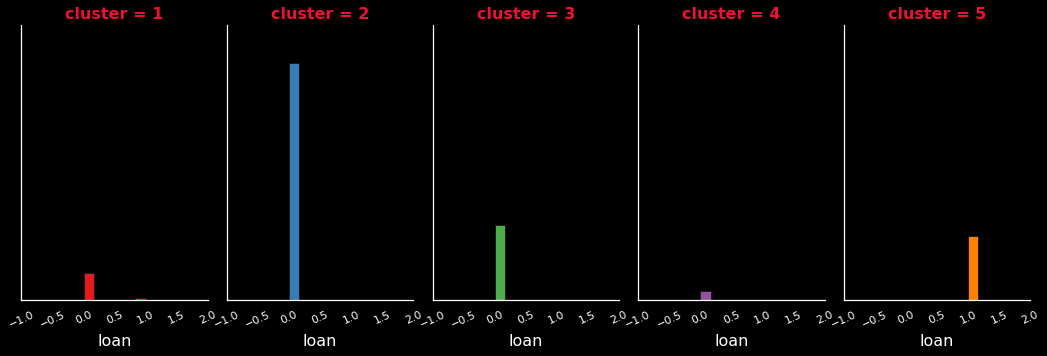

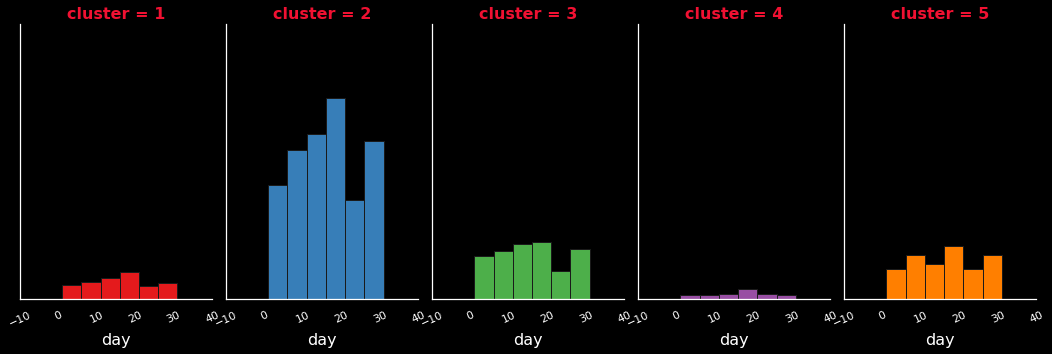

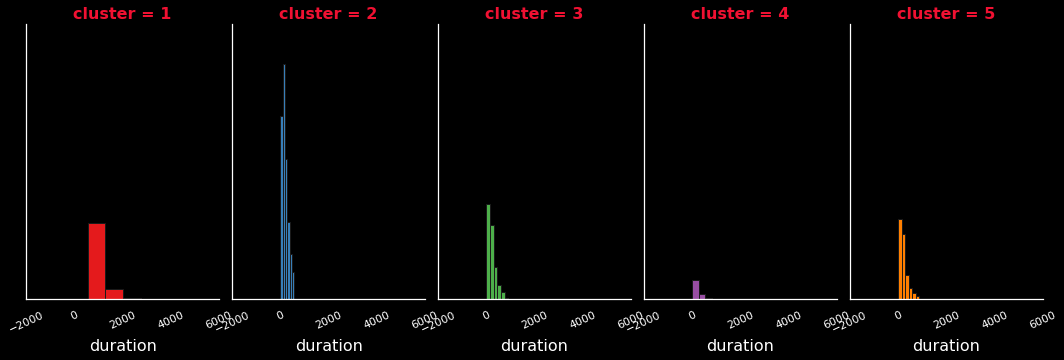

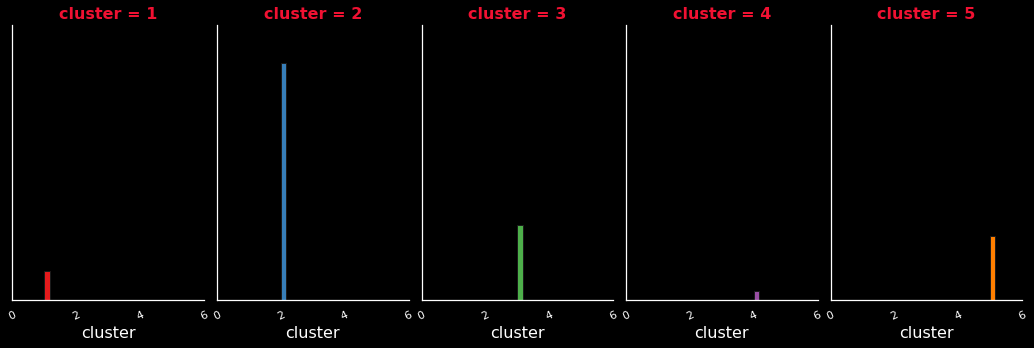

In [102]:
# Clusters interpretation 
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Ubuntu'})

for i in df:
    diag = sns.FacetGrid(df, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

Report
add Codeadd Markdown
Based on above information we can divide customer into 3 parts:-¶

Highly Active Customer :- These customers belong to cluster one.
Moderately Active Customer :- These customers belong to cluster two.
Least Active Customer :- These customers belong to cluster third.
add Codeadd Markdown
Characteristics of Highly Active Customer

In terms of Education
Highly Active Customer are from PG background
In terms of Marital_status
Number of people in relationship are approx. two times of single people
In terms of Income
Income of Highly active customer are little less as compare to Moderately active customer.
In terms of Kids
Highly active customer have more number of children as compare to other customer ( avg. of 1 child ).
In terms of Expenses
Expenses of Highly Active customer are less as compare to moderate.
These customer spent avg. of approx. 100-200 unit money.
In terms of Age
Age of these customer are between 25 to 75.
Maximum customer age are between 40 to 50.
In terms of day_engaged
Highly Active customer are more loyal as they engaged with company for longer period of time.
add Codeadd Markdown
Characteristics of Moderately Active Customer

In terms of Education
Moderately Active Customer are also from PG backgroud
In terms of Marital_status
Number of people in relationship are slightly more as compare to single people
In terms of Income
Income of Moderately active customer are higher as compare to other customer.
In terms of Kids
Moderately active customer have less number of childern as compare to highly active customer ( Max. customer has no child ).
In terms of Expenses
Expenses of Moderately Active customer are more as compare to Active.
These customer spent avg. of approx. 500-2000 unit money.
In terms of Age
Age of these customer are between 25 to 75.
Maximum customer age are between 35 to 60.
In terms of day_engaged
Moderately Active customer are slightly less engaged with company as compare to Highly Active Customer.
add Codeadd Markdown
Characteristics of Least Active Customer

In terms of Education
Least Active Customer are from UG backgroud
In terms of Marital_status

Number of people in relationship are approx. equal to single people
In terms of Income

Income of Least active customer are very less or say negligible.
In terms of Kids

Only few of these customer have child.
In terms of Expenses

Expenses of Least Active customer are very less or say negligible.
In terms of Age
Age of these customer are between 15 to 30.
In terms of day_engaged
Least Active customer are not much enrolled with company for longer time.
